$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
$$

# 4. Spherical Waves

In spherical coordinates $(r,\phi,\theta)$ with 

\begin{eqnarray}
x&=&r \sin \theta \cos \phi\tag{4.1a}\\
y&=&r \sin \theta \sin \phi\tag{4.1b}\\
z&=&r \cos \theta \tag{4.1c}
\end{eqnarray}

the Laplacian operator is

$$\nabla^2=\ppad{}{r} + \frac{2}{r}\pad{}{r} +\frac{1}{r^2 \sin \theta}\pad{}{\theta}\left(\sin \theta \pad{}{\theta}\right) +
\frac{1}{r^2 \sin^2 \theta} \ppad{}{\phi} \tag{4.2}
$$

If we assume spherical symmetry the the acoustic pressure is a function of $r$ only and the Laplacian simplifies to

$$\nabla^2=\ppad{}{r}+\frac{2}{r}\pad{}{r}\tag{4.3}\quad .$$

Thus the wave equation becomes

$$\ppad{p}{r}+\frac{2}{r}\pad{p}{r}=\frac{1}{c^2}\ppad{p}{t}\tag{4.4}\quad .$$

We can rewrite Eq. (4.4) as

$$\ppad{(p r)}{r}=\frac{1}{c^2}\ppad{(r p)}{t}\tag{4.5}\quad ,$$

which resembles a plane wave equation for the product of the variable $p$ and $r$. Thus the solution to this equation is

$$p r = f_1(c t - r) + f_2 (c t +r)$$

or 

$$p = \frac{1}{r} f_1(c t - r) + \frac{1}{r} f_2 (c t +r)\tag{4.6}\quad ,$$

for all $r>0$, the solution is not valid at $r=0$. Equation (4.6) is an outgoing and incoming wave where the amplitude is proportional to $1/r$. The reason for failure of Eq. (4.6) of the outgoing wave is that sound source is not accounted for. In contrast the incoming wave diverges at $r=0$. The reason why our equation becomes invalid is that the small amplitude limit is not valid anymore, nonlinearities build up and we need a better description which accounts for *finite amplitude effects*.




In [48]:
%matplotlib notebook 
import math as m
import numpy #array operations
import matplotlib.pyplot as plt #plotting
from IPython import display #for continous display
from ipywidgets import widgets #for the widgets

nimg=0

def plotwave(u,time):
    plt.figure(1)
    plt.clf()
    plt.plot(u)
    plt.gca().set_ylim([-2,2])
    display.clear_output(wait=True)
    display.display(plt.gcf())
        
def solvewave(b):
    tabs.visible=False
    #computational domain
    nx = 381
    size=2. #size of the domain
    #parameters of the wave
    c = 5. #speed of sound
    l=w_wavelength.value #wavelength
    nu=c/l #frequency
    omega=nu*2.*m.pi #angular frequency
    duration=w_sourceduration.value/nu #duration of source
    
    #further variables
    dx = size/(nx-1)
    CFL=0.05 #CFL number <1
    dt = CFL*dx/c 
    nt=int(w_simduration.value/dt) #number of time steps
    if w_position.value=='Left':
        sourcepos=0
    else:
        sourcepos=int(nx/2)
    
    #every xx times over the total nt timesteps an output should be generated 
    output=map(int,list(numpy.linspace(1,nt,int(nt/50))))

    u  = numpy.zeros(nx) #pressure at t
    un = numpy.zeros(nx) #pressure at t-dt
    unn= numpy.zeros(nx) #pressure at t-2*dt

    #Assign initial conditions, for a sine wave
    un[sourcepos]=0.    #amplitude is sin(omega*t) with t=0
    unn[sourcepos]=1.   #velocity  is cos(omega*t) with t=0

    C=c*c*dt*dt/dx/dx

    plt.figure(1, figsize=(8, 4), dpi=300)

    for n in range(nt+1): ##loop across number of time steps
        #this line computes the finite differences of the wave equation
        u[1:-1]=2.*un[1:-1]-unn[1:-1]+C*(un[:-2]+un[2:]-2.*un[1:-1])
 
        #Boundary conditions
        if w_boundary_r.value=='Open':
            u[-1] = un[-1]-dt*c/dx*(un[-1]-un[-2]) 
        else:
            u[-1] = u[-2]

        if w_boundary_l.value=='Open':
            u[0] = un[0]+dt*c/dx*(un[1]-un[0])
        else:
            u[0] = u[1]
            
        #pressure source
        if float(n*dt<duration):
            u[sourcepos]=m.sin(omega*n*dt)**2*float(n*dt<duration)
        
        #save values for the time derivative 
        unn=un.copy() #n-1 time steop
        un=u.copy()   #n time step
        
        if (n in output):
            plotwave(u,n*dt)
            
    #and plot the last figure    
    plotwave(u,n*dt)
    tabs.visible=True

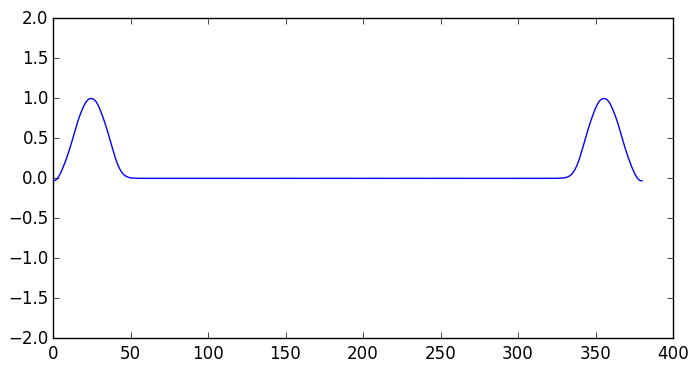

In [49]:
#setup the graphical interface 
w_wavelength=widgets.FloatSlider(description="Wavelength",value=.5,min=0.1,max=1)
w_sourceduration=widgets.FloatSlider(description="Emission Duration in Periods",value=.5,min=0.5,max=10)
w_simduration=widgets.FloatSlider(description="Simulation Duration",value=.25,min=0.1,max=10)
w_position=widgets.RadioButtons(description="Source Position",options=["Left", "Center"],value="Center")
w_start=widgets.Button(description="Start Simulation")
w_start.on_click(solvewave)
w_boundary_l=widgets.RadioButtons(description="Leftt Boundary",options=["Reflective", "Open"],value="Reflective")
w_boundary_r=widgets.RadioButtons(description="Right Boundary",options=["Reflective", "Open"],value="Reflective")

page1=widgets.Box([w_wavelength,w_sourceduration,w_simduration,w_position])
page2=widgets.Box([w_position])
page3=widgets.Box([w_boundary_l,w_boundary_r])
tabs = widgets.Tab(children=[page1, page2, page3])
tabs.set_title(0, 'Wave')
tabs.set_title(1, 'Source')
tabs.set_title(2, 'Boundaries')
display.display(tabs)
display.display(w_start)